In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [260]:
users=pd.read_csv('sales data/users.csv')
items=pd.read_csv('sales data/items.csv')
events=pd.read_csv('sales data/events.csv')

In [261]:
users.head()

,id,ltv,date
0,0,0,2020-10-13 05:08:47
1,1,0,2020-11-24 14:26:54
2,2,0,2020-11-24 06:19:54
3,3,231,2020-05-02 11:09:15
4,4,102,2020-11-18 15:54:38


In [262]:
items.head()

,id,name,brand,variant,category,price_in_usd
0,0,Google Land & Sea Cotton Cap,Google,Single Option Only,Apparel,14
1,1,Google KeepCup,Google,Single Option Only,New,28
2,2,Google Land & Sea Nalgene Water Bottle,Google,Single Option Only,Drinkware,20
3,3,Google Unisex Eco Tee Black,Google,LG,Uncategorized Items,22
4,4,Google Chicago Campus Bottle,Google,Single Option Only,Campus Collection,11


In [263]:
events.head()

,user_id,ga_session_id,country,device,type,item_id,date
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29


#### Check Types

In [264]:
users.dtypes

id       int64
ltv      int64
date    object
dtype: object

In [265]:
items.dtypes

id               int64
name            object
brand           object
variant         object
category        object
price_in_usd     int64
dtype: object

In [266]:
events.dtypes

user_id           int64
ga_session_id     int64
country          object
device           object
type             object
item_id           int64
date             object
dtype: object

#### Check info

In [267]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270154 entries, 0 to 270153
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      270154 non-null  int64 
 1   ltv     270154 non-null  int64 
 2   date    270154 non-null  object
dtypes: int64(2), object(1)
memory usage: 6.2+ MB


In [268]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1381 non-null   int64 
 1   name          1381 non-null   object
 2   brand         1381 non-null   object
 3   variant       973 non-null    object
 4   category      1381 non-null   object
 5   price_in_usd  1381 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 64.9+ KB


In [269]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758884 entries, 0 to 758883
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        758884 non-null  int64 
 1   ga_session_id  758884 non-null  int64 
 2   country        754329 non-null  object
 3   device         758884 non-null  object
 4   type           758884 non-null  object
 5   item_id        758884 non-null  int64 
 6   date           758884 non-null  object
dtypes: int64(3), object(4)
memory usage: 40.5+ MB


### Change Object to date type
    convert object in users and events in datetime

In [270]:
users.date=pd.to_datetime(users.date)
events.date=pd.to_datetime(events.date)

In [271]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270154 entries, 0 to 270153
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   id      270154 non-null  int64         
 1   ltv     270154 non-null  int64         
 2   date    270154 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 6.2 MB


In [272]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758884 entries, 0 to 758883
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        758884 non-null  int64         
 1   ga_session_id  758884 non-null  int64         
 2   country        754329 non-null  object        
 3   device         758884 non-null  object        
 4   type           758884 non-null  object        
 5   item_id        758884 non-null  int64         
 6   date           758884 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 40.5+ MB


### Missing Data

### a. Find Missing Data

In [273]:
users.isna().sum()

id      0
ltv     0
date    0
dtype: int64

In [274]:
items.isna().sum()

id                0
name              0
brand             0
variant         408
category          0
price_in_usd      0
dtype: int64

In [275]:
events.isna().sum()

user_id             0
ga_session_id       0
country          4555
device              0
type                0
item_id             0
date                0
dtype: int64

##### variant and country has null values explore them

In [276]:
items.variant.value_counts(dropna=False)

variant
NaN                     408
Single Option Only      263
 LG                      91
 MD                      90
 SM                      86
 XL                      79
 2XL                     63
 XS                      62
LG                       44
 3XL                     38
MD                       31
XL                       21
SM                       16
XS                        9
 3T                       8
 2T                       7
 4T                       7
 5/6T                     6
 18/24 MONTHS             6
 12/18 MONTHS             4
Choose Size               4
 6/12 MONTHS              4
 3/6 MONTHS               4
2XL                       3
3/6 MONTHS                3
3T                        2
2T                        2
3XL                       2
No options available      2
6/12 MONTHS               1
 XXS                      1
 6M                       1
 24M                      1
 5T                       1
 BLUE                     1
 GREEN      

In [277]:
events.country.value_counts(dropna=False)

country
US    337513
IN     68392
CA     61126
GB     23128
ES     16191
       ...  
TT        36
XK        35
LB        31
HN        31
MM        27
Name: count, Length: 109, dtype: int64

In [278]:
events[events['country'].isna()]

,user_id,ga_session_id,country,device,type,item_id,date
233,2486,16930,NaN,desktop,purchase,414,2020-11-03 01:22:03
234,2486,16930,NaN,desktop,purchase,522,2020-11-03 01:22:03
412,24515,17418,NaN,mobile,purchase,185,2020-11-04 07:13:58
1014,15489,16893,NaN,desktop,purchase,23,2020-11-09 15:36:09
1015,15489,16893,NaN,desktop,purchase,24,2020-11-09 15:36:09
...,...,...,...,...,...,...,...
754055,6310,3258,NaN,desktop,add_to_cart,981,2021-01-30 10:54:56
754056,6310,3258,NaN,desktop,add_to_cart,1351,2021-01-30 10:54:56
754057,6310,3258,NaN,desktop,add_to_cart,1107,2021-01-30 10:54:56
754058,6310,3258,NaN,desktop,add_to_cart,1130,2021-01-30 10:54:56


#### Percentage of missing country 

In [279]:
(events.country.isna().sum()/len(events))*100

0.6002234860663817

In [280]:
items[items.isna().any(axis=1)]

,id,name,brand,variant,category,price_in_usd
835,835,Google Black Cloud Zip Hoodie,Google Cloud,NaN,Apparel,69
837,837,Google Women's Kirkland Pullover,Google,NaN,Apparel,63
839,839,Android Pocket Onesie White,Android,NaN,Apparel,22
840,840,Android Pocket Onesie Navy,Android,NaN,Apparel,22
841,841,Google Beekeepers Onesie Pink,Google,NaN,Apparel,25
...,...,...,...,...,...,...
1375,1375,Google Grey Women's Tee,Google,NaN,Shop by Brand,21
1376,1376,Google Tritan Bottle Gray,Google,NaN,Shop by Brand,12
1377,1377,White Google Cloud Tumbler,Google,NaN,Shop by Brand,27
1378,1378,Google Separating Keyring,Google,NaN,Accessories,6


#### Percentage of Missing values

In [281]:
(items.variant.isna().sum()/len(items))*100

29.54380883417813

### b. Handling missing data

#### Missing country only contains 0.6% so lets drop rows with missing values

In [282]:
events.dropna(subset=['country'],inplace=True)

In [283]:
# Check Wheather country column has any missing values
events.country.isna().sum()

0

### Inconsistent Text and Typos

In [284]:
### Check for inconsistent Text and typos in items table

In [285]:
items.head()

,id,name,brand,variant,category,price_in_usd
0,0,Google Land & Sea Cotton Cap,Google,Single Option Only,Apparel,14
1,1,Google KeepCup,Google,Single Option Only,New,28
2,2,Google Land & Sea Nalgene Water Bottle,Google,Single Option Only,Drinkware,20
3,3,Google Unisex Eco Tee Black,Google,LG,Uncategorized Items,22
4,4,Google Chicago Campus Bottle,Google,Single Option Only,Campus Collection,11


In [286]:
items.name.value_counts()

name
Google Land & Sea French Terry Sweatshirt    14
YouTube Icon Tee Grey                         9
Google Crewneck Sweatshirt Green              9
YouTube Icon Tee Charcoal                     9
Google Cotopaxi Shell                         9
                                             ..
Google Shoreline Water Bottle                 1
Gift Card- $100.00                            1
Google SF Campus Mug                          1
Unisex Google Jumbo Print Tee White           1
Google Mountain View Campus Bottle            1
Name: count, Length: 421, dtype: int64

In [287]:
items.brand.value_counts()

brand
Google            1166
Android            123
YouTube             48
#IamRemarkable      31
Google Cloud        13
Name: count, dtype: int64

In [288]:
items.category.value_counts()

category
Apparel                    582
Campus Collection          198
Clearance                  123
New                         86
Accessories                 82
Uncategorized Items         56
Shop by Brand               55
Bags                        48
Office                      34
Lifestyle                   26
Drinkware                   24
Stationery                  16
Small Goods                 12
Writing Instruments         10
Google                       8
Gift Cards                   8
Notebooks & Journals         4
Black Lives Matter           3
Electronics Accessories      2
Fun                          2
Eco-Friendly                 2
Name: count, dtype: int64

In [289]:
### Check for inconsistent Text and typos in events table
events.head()

,user_id,ga_session_id,country,device,type,item_id,date
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29


In [290]:
events.device.value_counts()

device
desktop    438888
mobile     298756
tablet      16685
Name: count, dtype: int64

In [291]:
events.type.value_counts()

type
add_to_cart       663305
begin_checkout     75549
purchase           15475
Name: count, dtype: int64

### Duplicate Rows

####  a. Finding duplicate rows

In [292]:
events.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
758879    False
758880    False
758881    False
758882    False
758883    False
Length: 754329, dtype: bool

In [293]:
events[events.duplicated()]

,user_id,ga_session_id,country,device,type,item_id,date
13702,20939,16135,IT,desktop,purchase,526,2020-11-18 12:20:09
13703,20939,16135,IT,desktop,purchase,118,2020-11-18 12:20:09
14060,4497,4644,US,mobile,purchase,9,2020-11-18 14:55:50
14061,4497,4644,US,mobile,purchase,213,2020-11-18 14:55:50
14329,4140,9700,US,mobile,purchase,350,2020-11-18 18:08:56
...,...,...,...,...,...,...,...
758828,19742,9347,US,desktop,begin_checkout,47,2021-01-31 23:46:16
758829,19742,9347,US,desktop,begin_checkout,47,2021-01-31 23:46:16
758831,19742,9347,US,desktop,begin_checkout,47,2021-01-31 23:46:47
758832,19742,9347,US,desktop,begin_checkout,47,2021-01-31 23:46:47


In [294]:
events[events.duplicated(keep=False)]

,user_id,ga_session_id,country,device,type,item_id,date
13700,20939,16135,IT,desktop,purchase,526,2020-11-18 12:20:09
13701,20939,16135,IT,desktop,purchase,118,2020-11-18 12:20:09
13702,20939,16135,IT,desktop,purchase,526,2020-11-18 12:20:09
13703,20939,16135,IT,desktop,purchase,118,2020-11-18 12:20:09
14058,4497,4644,US,mobile,purchase,9,2020-11-18 14:55:50
...,...,...,...,...,...,...,...
758830,19742,9347,US,desktop,begin_checkout,47,2021-01-31 23:46:47
758831,19742,9347,US,desktop,begin_checkout,47,2021-01-31 23:46:47
758832,19742,9347,US,desktop,begin_checkout,47,2021-01-31 23:46:47
758834,9063,9348,US,mobile,begin_checkout,116,2021-01-31 23:48:27


In [295]:
items.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1376    False
1377    False
1378    False
1379    False
1380    False
Length: 1381, dtype: bool

In [296]:
# No items are duplicated
items[items.duplicated(keep=False)]

,id,name,brand,variant,category,price_in_usd


### Merge 

In [297]:
users.head()

,id,ltv,date
0,0,0,2020-10-13 05:08:47
1,1,0,2020-11-24 14:26:54
2,2,0,2020-11-24 06:19:54
3,3,231,2020-05-02 11:09:15
4,4,102,2020-11-18 15:54:38


In [298]:
items.head()

,id,name,brand,variant,category,price_in_usd
0,0,Google Land & Sea Cotton Cap,Google,Single Option Only,Apparel,14
1,1,Google KeepCup,Google,Single Option Only,New,28
2,2,Google Land & Sea Nalgene Water Bottle,Google,Single Option Only,Drinkware,20
3,3,Google Unisex Eco Tee Black,Google,LG,Uncategorized Items,22
4,4,Google Chicago Campus Bottle,Google,Single Option Only,Campus Collection,11


In [299]:
events.head()

,user_id,ga_session_id,country,device,type,item_id,date
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29


In [300]:
print('Length of users table:',len(users))
print('Length of items table',len(items))
print('Lenght of Events table',len(events))

Length of users table: 270154
Length of items table 1381
Lenght of Events table 754329


In [301]:
events_users_df=events.merge(users,how='left',left_on='user_id',right_on='id')

In [302]:
events_users_df.head()

,user_id,ga_session_id,country,device,type,item_id,date_x,id,ltv,date_y
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14,2133,34,2020-11-01 00:09:55
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14,2133,34,2020-11-01 00:09:55
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44,5789,72,2020-10-14 00:26:03
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44,5789,72,2020-10-14 00:26:03
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29,5808,0,2020-08-18 03:44:52


In [303]:
events_users_items_df=events_users_df.merge(items,how='left',left_on='item_id',right_on='id')

In [304]:
events_users_items_df.head()

,user_id,ga_session_id,country,device,type,item_id,date_x,id_x,ltv,date_y,id_y,name,brand,variant,category,price_in_usd
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14,2133,34,2020-11-01 00:09:55,94,Google Large Tote White,Google,Single Option Only,Bags,10
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14,2133,34,2020-11-01 00:09:55,425,Google Heather Green Speckled Tee,Google,XL,Apparel,21
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44,5789,72,2020-10-14 00:26:03,1,Google KeepCup,Google,Single Option Only,New,28
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44,5789,72,2020-10-14 00:26:03,62,Google Mini Kick Ball,Google,Single Option Only,Fun,2
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29,5808,0,2020-08-18 03:44:52,842,Google Infant Hero Onesie Grey,Google,NaN,Apparel,25


In [305]:
data=events_users_items_df.copy()

In [306]:
data=data.rename(columns={'date_x':'events_date','date_y':'users_date','id_x':'id_users','id_y':'id_items'})

In [307]:
data=data.drop(['ga_session_id','id_users','id_items'],axis=1)


In [308]:
data.head()


,user_id,country,device,type,item_id,events_date,ltv,users_date,name,brand,variant,category,price_in_usd
0,2133,US,mobile,purchase,94,2020-11-01 00:27:14,34,2020-11-01 00:09:55,Google Large Tote White,Google,Single Option Only,Bags,10
1,2133,US,mobile,purchase,425,2020-11-01 00:27:14,34,2020-11-01 00:09:55,Google Heather Green Speckled Tee,Google,XL,Apparel,21
2,5789,SE,desktop,purchase,1,2020-11-01 01:44:44,72,2020-10-14 00:26:03,Google KeepCup,Google,Single Option Only,New,28
3,5789,SE,desktop,purchase,62,2020-11-01 01:44:44,72,2020-10-14 00:26:03,Google Mini Kick Ball,Google,Single Option Only,Fun,2
4,5808,US,mobile,add_to_cart,842,2020-11-01 03:06:29,0,2020-08-18 03:44:52,Google Infant Hero Onesie Grey,Google,NaN,Apparel,25


###  Exploratory Data Analysis

In [309]:
data[data['type']=='purchase']

,user_id,country,device,type,item_id,events_date,ltv,users_date,name,brand,variant,category,price_in_usd
0,2133,US,mobile,purchase,94,2020-11-01 00:27:14,34,2020-11-01 00:09:55,Google Large Tote White,Google,Single Option Only,Bags,10
1,2133,US,mobile,purchase,425,2020-11-01 00:27:14,34,2020-11-01 00:09:55,Google Heather Green Speckled Tee,Google,XL,Apparel,21
2,5789,SE,desktop,purchase,1,2020-11-01 01:44:44,72,2020-10-14 00:26:03,Google KeepCup,Google,Single Option Only,New,28
3,5789,SE,desktop,purchase,62,2020-11-01 01:44:44,72,2020-10-14 00:26:03,Google Mini Kick Ball,Google,Single Option Only,Fun,2
52,20120,CA,desktop,purchase,423,2020-11-01 04:11:11,25,2020-11-01 04:01:10,Android Iconic Backpack,Android,Single Option Only,New,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
750716,8321,US,desktop,purchase,646,2021-01-30 21:35:18,16,2021-01-28 20:16:59,YouTube Small Sticker Sheet,YouTube,Single Option Only,Accessories,2
750717,8321,US,desktop,purchase,77,2021-01-30 21:35:18,16,2021-01-28 20:16:59,YouTube Twill Sandwich Cap Black,YouTube,Single Option Only,Apparel,10
750718,27900,US,mobile,purchase,148,2021-01-30 21:38:13,28,2020-07-15 04:30:09,Google Campus Bike Corkbase Mug Blue,Google,Single Option Only,Lifestyle,14
750719,27900,US,mobile,purchase,194,2021-01-30 21:38:13,28,2020-07-15 04:30:09,Google LA Campus Mug,Google,Single Option Only,Campus Collection,7


#### Top 20 users by LTV who purchase product

In [310]:
data.loc[data['type']=='purchase',['ltv','name']].sort_values('ltv',ascending=False)[:20]

,ltv,name
349664,1530,Google Crew Combed Cotton Sock
349674,1530,Noogler Android Figure
349665,1530,Google Perk Thermal Tumbler
349666,1530,Google 16 oz Tumbler Blue
349667,1530,Google Clear Pen 4-Pack
349668,1530,Google Laptop and Cell Phone Stickers
349669,1530,Google Hemp Tote
349670,1530,Google Zip Hoodie F/C
349671,1530,Google Seaport Tote
349672,1530,Google Campus Bike


#### Users from USA Who purchase Product

In [311]:
mask=(data['type']=='purchase') & (data['country']=='US')
data[mask]

,user_id,country,device,type,item_id,events_date,ltv,users_date,name,brand,variant,category,price_in_usd
0,2133,US,mobile,purchase,94,2020-11-01 00:27:14,34,2020-11-01 00:09:55,Google Large Tote White,Google,Single Option Only,Bags,10
1,2133,US,mobile,purchase,425,2020-11-01 00:27:14,34,2020-11-01 00:09:55,Google Heather Green Speckled Tee,Google,XL,Apparel,21
53,16563,US,desktop,purchase,426,2020-11-01 06:17:40,87,2020-11-01 06:03:35,YouTube Icon Tee Grey,YouTube,2XL,Apparel,22
54,16563,US,desktop,purchase,427,2020-11-01 06:17:40,87,2020-11-01 06:03:35,Android Pocket Tee Green,Android,2XL,Apparel,29
55,16563,US,desktop,purchase,428,2020-11-01 06:17:40,87,2020-11-01 06:03:35,Android Garden Tee Orange,Android,2XL,Apparel,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
750716,8321,US,desktop,purchase,646,2021-01-30 21:35:18,16,2021-01-28 20:16:59,YouTube Small Sticker Sheet,YouTube,Single Option Only,Accessories,2
750717,8321,US,desktop,purchase,77,2021-01-30 21:35:18,16,2021-01-28 20:16:59,YouTube Twill Sandwich Cap Black,YouTube,Single Option Only,Apparel,10
750718,27900,US,mobile,purchase,148,2021-01-30 21:38:13,28,2020-07-15 04:30:09,Google Campus Bike Corkbase Mug Blue,Google,Single Option Only,Lifestyle,14
750719,27900,US,mobile,purchase,194,2021-01-30 21:38:13,28,2020-07-15 04:30:09,Google LA Campus Mug,Google,Single Option Only,Campus Collection,7


Text(0, 0.5, 'Count')

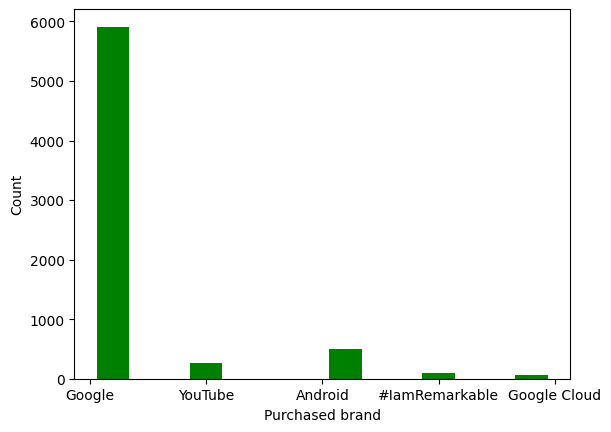

In [312]:
plt.hist(data=data[mask],x='brand',rwidth=0.7,color='green')
plt.xlabel('Purchased brand')
plt.ylabel('Count')

Text(0.5, 0, 'USA users purchase prodcuts by categoey')

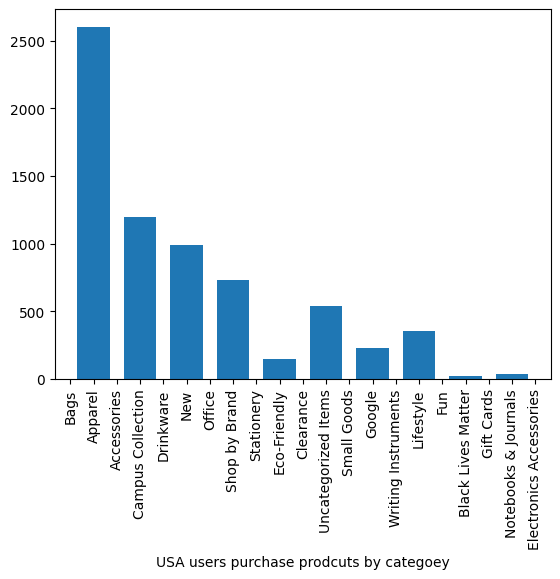

In [313]:
plt.hist(data=data[mask],x='category',rwidth=0.7)
plt.xticks(rotation='vertical')
plt.xlabel('USA users purchase prodcuts by categoey')

### Product which have  price gt $250
   
   - As You can see all the product are Gift cards worth $250

In [314]:
data[data['price_in_usd']>250]

,user_id,country,device,type,item_id,events_date,ltv,users_date,name,brand,variant,category,price_in_usd
227461,24439,US,desktop,add_to_cart,1371,2020-12-08 14:44:44,50,2020-12-08 14:30:57,Gift Card - $250.00,Google,NaN,Gift Cards,313
234284,18702,TH,desktop,add_to_cart,1371,2020-12-08 22:46:53,518,2020-12-03 01:59:33,Gift Card - $250.00,Google,NaN,Gift Cards,313
368599,4244,IN,desktop,add_to_cart,1371,2020-12-15 08:59:40,0,2020-11-24 09:18:59,Gift Card - $250.00,Google,NaN,Gift Cards,313
368631,4244,IN,desktop,add_to_cart,1371,2020-12-15 09:02:35,0,2020-11-24 09:18:59,Gift Card - $250.00,Google,NaN,Gift Cards,313
373987,19585,US,mobile,add_to_cart,1371,2020-12-15 14:13:50,100,2020-12-14 21:56:25,Gift Card - $250.00,Google,NaN,Gift Cards,313
464156,19585,US,mobile,add_to_cart,1371,2020-12-20 14:38:18,100,2020-12-14 21:56:25,Gift Card - $250.00,Google,NaN,Gift Cards,313
464165,19585,US,mobile,add_to_cart,1371,2020-12-20 14:39:04,100,2020-12-14 21:56:25,Gift Card - $250.00,Google,NaN,Gift Cards,313
478703,7762,US,mobile,add_to_cart,1371,2020-12-22 01:07:32,100,2020-12-09 18:36:55,Gift Card - $250.00,Google,NaN,Gift Cards,313
478706,7762,US,mobile,add_to_cart,1371,2020-12-22 01:07:48,100,2020-12-09 18:36:55,Gift Card - $250.00,Google,NaN,Gift Cards,313
533683,7424,GB,desktop,add_to_cart,1371,2020-12-28 15:08:38,125,2020-05-02 09:24:46,Gift Card - $250.00,Google,NaN,Gift Cards,313


### User Purchase Product gt $250

  - No one brought Gift card worth $250 in Nov,Dec -2020 and Jan-2021

In [315]:
mask=(data['price_in_usd']>250) & (data['type']=='purchase')
print('Users Purchased Item Worth greater than $250 :',len(data[mask]))

Users Purchased Item Worth greater than $250 : 0


In [316]:
mask=(data['price_in_usd']>250) & (data['type']=='add_to_cart')
data[mask]

,user_id,country,device,type,item_id,events_date,ltv,users_date,name,brand,variant,category,price_in_usd
227461,24439,US,desktop,add_to_cart,1371,2020-12-08 14:44:44,50,2020-12-08 14:30:57,Gift Card - $250.00,Google,NaN,Gift Cards,313
234284,18702,TH,desktop,add_to_cart,1371,2020-12-08 22:46:53,518,2020-12-03 01:59:33,Gift Card - $250.00,Google,NaN,Gift Cards,313
368599,4244,IN,desktop,add_to_cart,1371,2020-12-15 08:59:40,0,2020-11-24 09:18:59,Gift Card - $250.00,Google,NaN,Gift Cards,313
368631,4244,IN,desktop,add_to_cart,1371,2020-12-15 09:02:35,0,2020-11-24 09:18:59,Gift Card - $250.00,Google,NaN,Gift Cards,313
373987,19585,US,mobile,add_to_cart,1371,2020-12-15 14:13:50,100,2020-12-14 21:56:25,Gift Card - $250.00,Google,NaN,Gift Cards,313
464156,19585,US,mobile,add_to_cart,1371,2020-12-20 14:38:18,100,2020-12-14 21:56:25,Gift Card - $250.00,Google,NaN,Gift Cards,313
464165,19585,US,mobile,add_to_cart,1371,2020-12-20 14:39:04,100,2020-12-14 21:56:25,Gift Card - $250.00,Google,NaN,Gift Cards,313
478703,7762,US,mobile,add_to_cart,1371,2020-12-22 01:07:32,100,2020-12-09 18:36:55,Gift Card - $250.00,Google,NaN,Gift Cards,313
478706,7762,US,mobile,add_to_cart,1371,2020-12-22 01:07:48,100,2020-12-09 18:36:55,Gift Card - $250.00,Google,NaN,Gift Cards,313
533683,7424,GB,desktop,add_to_cart,1371,2020-12-28 15:08:38,125,2020-05-02 09:24:46,Gift Card - $250.00,Google,NaN,Gift Cards,313


### Users added 35 Gift Cards worth $250 to their cart

In [317]:
product_gt_250_to_cart=data[mask]
product_gt_250_to_cart.drop_duplicates()
print('Users Added Item to cart worth greater than $250 :',len(product_gt_250_to_cart.drop_duplicates()))

Users Added Item to cart worth greater than $250 : 35


In [318]:
mask=(data['price_in_usd']>100) & (data['price_in_usd']<250) & (data['type']=='purchase')
product_100_250_purchase=data[mask]
product_100_250_purchase

,user_id,country,device,type,item_id,events_date,ltv,users_date,name,brand,variant,category,price_in_usd
76,31027,US,desktop,purchase,424,2020-11-01 20:46:35,120,2020-11-01 19:35:41,Google Raincoat Navy,Google,2XL,Apparel,120
119,20451,US,desktop,purchase,164,2020-11-02 09:46:54,795,2020-10-25 10:48:55,Google Women's Puff Jacket Black,Google,MD,Apparel,115
850,14623,IN,mobile,purchase,638,2020-11-08 00:54:05,235,2020-11-07 23:13:55,Google Men's Puff Jacket Black,Google,3XL,Apparel,115
851,14623,IN,mobile,purchase,424,2020-11-08 00:54:05,235,2020-11-07 23:13:55,Google Raincoat Navy,Google,2XL,Apparel,120
856,18868,IE,desktop,purchase,164,2020-11-08 02:10:12,292,2020-08-03 02:25:32,Google Women's Puff Jacket Black,Google,MD,Apparel,115
876,11061,CN,desktop,purchase,638,2020-11-08 07:53:44,523,2020-10-22 12:18:39,Google Men's Puff Jacket Black,Google,3XL,Apparel,115
879,11061,CN,desktop,purchase,638,2020-11-08 07:55:09,523,2020-10-22 12:18:39,Google Men's Puff Jacket Black,Google,3XL,Apparel,115
939,5401,AU,desktop,purchase,164,2020-11-08 22:58:55,193,2020-03-05 20:22:32,Google Women's Puff Jacket Black,Google,MD,Apparel,115
17242,18098,BR,desktop,purchase,164,2020-11-20 13:56:27,355,2020-11-19 11:47:26,Google Women's Puff Jacket Black,Google,MD,Apparel,115
17250,18098,BR,desktop,purchase,164,2020-11-20 13:56:27,355,2020-11-19 11:47:26,Google Women's Puff Jacket Black,Google,MD,Apparel,115


#### Number of items(price between $100 - $250) sold by country

In [319]:
product_100_250_purchase.groupby('country')['price_in_usd'].count().sort_values(ascending=False)

country
US    23
CA     3
BR     2
CN     2
IN     2
TW     2
AU     1
DK     1
IE     1
JP     1
KR     1
Name: price_in_usd, dtype: int64

#### Total Sell(in dollers ) of Items(Price Between $100 - $250) by Country

In [320]:
product_100_250_purchase.groupby('country')['price_in_usd'].sum().sort_values(ascending=False)

country
US    2675
CA     350
IN     235
BR     230
CN     230
TW     230
AU     115
DK     115
IE     115
JP     115
KR     115
Name: price_in_usd, dtype: int64

Text(0.5, 0, 'Product Purchased Between 100-250 Dollers By Country')

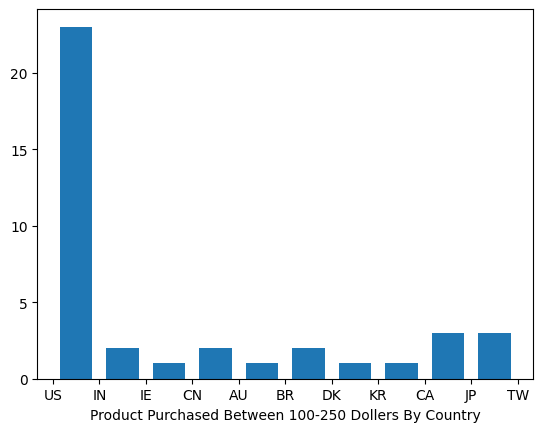

In [321]:
plt.hist(data=product_100_250_purchase,x='country',rwidth=0.7)
plt.xlabel('Product Purchased Between 100-250 Dollers By Country')

In [322]:
print('User Purchased Product worth between $100 - $250 :',len(data[mask]))

User Purchased Product worth between $100 - $250 : 39


In [323]:
print('Total Sell of product worth between $100 - $250 : ',product_100_250_purchase['price_in_usd'].sum())

Total Sell of product worth between $100 - $250 :  4525


In [324]:
mask=(data['price_in_usd']>0) & (data['price_in_usd']<100) & (data['type']=='purchase')
product_0_100_purchase=data[mask]
product_0_100_purchase

,user_id,country,device,type,item_id,events_date,ltv,users_date,name,brand,variant,category,price_in_usd
0,2133,US,mobile,purchase,94,2020-11-01 00:27:14,34,2020-11-01 00:09:55,Google Large Tote White,Google,Single Option Only,Bags,10
1,2133,US,mobile,purchase,425,2020-11-01 00:27:14,34,2020-11-01 00:09:55,Google Heather Green Speckled Tee,Google,XL,Apparel,21
2,5789,SE,desktop,purchase,1,2020-11-01 01:44:44,72,2020-10-14 00:26:03,Google KeepCup,Google,Single Option Only,New,28
3,5789,SE,desktop,purchase,62,2020-11-01 01:44:44,72,2020-10-14 00:26:03,Google Mini Kick Ball,Google,Single Option Only,Fun,2
52,20120,CA,desktop,purchase,423,2020-11-01 04:11:11,25,2020-11-01 04:01:10,Android Iconic Backpack,Android,Single Option Only,New,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
750716,8321,US,desktop,purchase,646,2021-01-30 21:35:18,16,2021-01-28 20:16:59,YouTube Small Sticker Sheet,YouTube,Single Option Only,Accessories,2
750717,8321,US,desktop,purchase,77,2021-01-30 21:35:18,16,2021-01-28 20:16:59,YouTube Twill Sandwich Cap Black,YouTube,Single Option Only,Apparel,10
750718,27900,US,mobile,purchase,148,2021-01-30 21:38:13,28,2020-07-15 04:30:09,Google Campus Bike Corkbase Mug Blue,Google,Single Option Only,Lifestyle,14
750719,27900,US,mobile,purchase,194,2021-01-30 21:38:13,28,2020-07-15 04:30:09,Google LA Campus Mug,Google,Single Option Only,Campus Collection,7


#### Total Items sold(Price between $0 - $100)

In [325]:
print('User Purchase Product Between $0 - $100 :',len(data[mask]))

User Purchase Product Between $0 - $100 : 15424


#### Total sell in doller item($0 - $100)

In [326]:
print('Total sell of product Between $0 - $100 in dollers:',product_0_100_purchase['price_in_usd'].sum())

Total sell of product Between $0 - $100 in dollers: 299879


#### Total sell of items (price between $0 - $100) by country

In [327]:
product_0_100_purchase.groupby('country')['price_in_usd'].sum().sort_values(ascending=False)[:10]

country
US    134734
IN     28392
CA     25455
GB      8969
ES      7563
FR      5515
CN      5306
TR      4520
DE      4497
JP      4430
Name: price_in_usd, dtype: int64

#### Users Which have LTV gt 1000 and who purchase product

In [328]:
mask=(data['ltv']>=1000) & (data['type']=='purchase')
user_gt_ltv_1000_purchase=data[mask]
user_gt_ltv_1000_purchase

,user_id,country,device,type,item_id,events_date,ltv,users_date,name,brand,variant,category,price_in_usd
183,1885,CA,desktop,purchase,281,2020-11-02 17:39:12,1126,2020-10-20 04:53:39,Google Emoji Sticker Pack,Google,Single Option Only,Accessories,4
184,1885,CA,desktop,purchase,240,2020-11-02 17:39:12,1126,2020-10-20 04:53:39,Google Yellow YoYo,Google,Single Option Only,New,3
185,1885,CA,desktop,purchase,185,2020-11-02 17:39:12,1126,2020-10-20 04:53:39,Google Perk Thermal Tumbler,Google,Single Option Only,Lifestyle,16
186,1885,CA,desktop,purchase,230,2020-11-02 17:39:12,1126,2020-10-20 04:53:39,Google Clear Framed Yellow Shades,Google,Single Option Only,Accessories,3
187,1885,CA,desktop,purchase,92,2020-11-02 17:39:12,1126,2020-10-20 04:53:39,Google Large Standard Journal Grey,Google,Single Option Only,Office,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
662897,27893,CA,mobile,purchase,780,2021-01-19 01:13:12,1200,2021-01-18 16:43:11,Gift Card- $100.00,Google,Single Option Only,Gift Cards,100
662898,27893,CA,mobile,purchase,780,2021-01-19 01:13:12,1200,2021-01-18 16:43:11,Gift Card- $100.00,Google,Single Option Only,Gift Cards,100
662899,27893,CA,mobile,purchase,780,2021-01-19 01:13:12,1200,2021-01-18 16:43:11,Gift Card- $100.00,Google,Single Option Only,Gift Cards,100
662900,27893,CA,mobile,purchase,780,2021-01-19 01:13:12,1200,2021-01-18 16:43:11,Gift Card- $100.00,Google,Single Option Only,Gift Cards,100


In [329]:
user_gt_ltv_1000_purchase.groupby('category')['price_in_usd'].count().sort_values(ascending=False)

category
Apparel                43
Bags                   21
Gift Cards             12
New                     8
Campus Collection       6
Clearance               6
Accessories             5
Drinkware               5
Lifestyle               4
Office                  3
Google                  2
Fun                     1
Shop by Brand           1
Stationery              1
Uncategorized Items     1
Name: price_in_usd, dtype: int64

In [330]:
user_gt_ltv_1000_purchase.groupby('variant')['price_in_usd'].count().sort_values(ascending=False)

variant
Single Option Only    72
 MD                   11
 LG                   10
 XL                    8
 SM                    7
 XS                    5
 2XL                   4
 3XL                   2
Name: price_in_usd, dtype: int64

Text(0.5, 0, 'User With gt 1000 LTV Purchase By category')

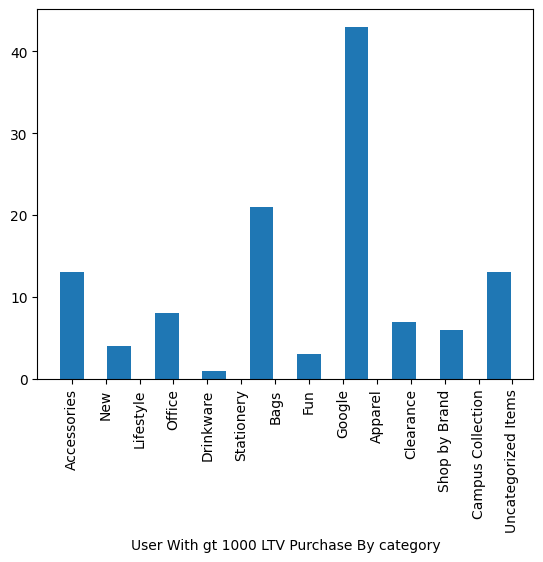

In [331]:
plt.hist(data=user_gt_ltv_1000_purchase,x='category',align='left',rwidth=0.5)
plt.xticks(rotation='vertical')
plt.xlabel('User With gt 1000 LTV Purchase By category')

In [332]:
print('No of Users with ltv greater than 1000 who purchased product:',len(user_gt_ltv_1000_purchase))

No of Users with ltv greater than 1000 who purchased product: 119


In [333]:
mask=(data['ltv']>1000) & (data['type']=='begin_checkout')
user_gt_1000_ltv_begin_chackout=data[mask]
user_gt_1000_ltv_begin_chackout

,user_id,country,device,type,item_id,events_date,ltv,users_date,name,brand,variant,category,price_in_usd
97556,3736,CA,desktop,begin_checkout,279,2020-11-30 22:58:26,1049,2020-09-17 22:34:56,Google Badge Heavyweight Pullover Black,Google,3XL,Apparel,46
97557,3736,CA,desktop,begin_checkout,142,2020-11-30 22:58:26,1049,2020-09-17 22:34:56,Google Badge Heavyweight Pullover Black,Google,XL,Apparel,46
97558,3736,CA,desktop,begin_checkout,178,2020-11-30 22:58:26,1049,2020-09-17 22:34:56,Google Crewneck Sweatshirt Navy,Google,SM,Apparel,44
97559,3736,CA,desktop,begin_checkout,185,2020-11-30 22:58:26,1049,2020-09-17 22:34:56,Google Perk Thermal Tumbler,Google,Single Option Only,Lifestyle,16
97560,3736,CA,desktop,begin_checkout,586,2020-11-30 22:58:26,1049,2020-09-17 22:34:56,Google Crewneck Sweatshirt Navy,Google,XS,Apparel,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
662885,27893,CA,mobile,begin_checkout,780,2021-01-19 01:12:20,1200,2021-01-18 16:43:11,Gift Card- $100.00,Google,Single Option Only,Gift Cards,100
662886,27893,CA,mobile,begin_checkout,780,2021-01-19 01:12:20,1200,2021-01-18 16:43:11,Gift Card- $100.00,Google,Single Option Only,Gift Cards,100
662887,27893,CA,mobile,begin_checkout,780,2021-01-19 01:12:20,1200,2021-01-18 16:43:11,Gift Card- $100.00,Google,Single Option Only,Gift Cards,100
662888,27893,CA,mobile,begin_checkout,780,2021-01-19 01:12:20,1200,2021-01-18 16:43:11,Gift Card- $100.00,Google,Single Option Only,Gift Cards,100


In [334]:
print('Users with greater than 1000 ltv and begin checkout :',len(user_gt_1000_ltv_begin_chackout))

Users with greater than 1000 ltv and begin checkout : 893


In [335]:
mask=(data['ltv']>1000) & (data['type']=='add_to_cart')
users_gt_1000_ltv_add_to_cart = data[mask]
users_gt_1000_ltv_add_to_cart

,user_id,country,device,type,item_id,events_date,ltv,users_date,name,brand,variant,category,price_in_usd
83236,3736,CA,desktop,add_to_cart,1074,2020-11-30 10:38:19,1049,2020-09-17 22:34:56,Super G Unisex Joggers,Google,NaN,Shop by Brand,37
83237,3736,CA,desktop,add_to_cart,1230,2020-11-30 10:38:19,1049,2020-09-17 22:34:56,Google Eco Tee Black,Google,LG,Apparel,22
83238,3736,CA,desktop,add_to_cart,1058,2020-11-30 10:38:19,1049,2020-09-17 22:34:56,Google Heather Green Speckled Tee,Google,NaN,Apparel,30
83239,3736,CA,desktop,add_to_cart,946,2020-11-30 10:38:19,1049,2020-09-17 22:34:56,Google Campus Bike Eco Tee Navy,Google,NaN,Apparel,25
83240,3736,CA,desktop,add_to_cart,1085,2020-11-30 10:38:19,1049,2020-09-17 22:34:56,Google F/C Long Sleeve Tee Charcoal,Google,NaN,Apparel,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
661518,27893,CA,mobile,add_to_cart,780,2021-01-18 17:05:02,1200,2021-01-18 16:43:11,Gift Card- $100.00,Google,Single Option Only,Gift Cards,100
661519,27893,CA,mobile,add_to_cart,1369,2021-01-18 17:05:02,1200,2021-01-18 16:43:11,Gift Card - $25.00,Google,NaN,Gift Cards,31
661520,27893,CA,mobile,add_to_cart,1370,2021-01-18 17:05:02,1200,2021-01-18 16:43:11,Gift Card - $10.00,Google,NaN,Gift Cards,13
661521,27893,CA,mobile,add_to_cart,1371,2021-01-18 17:05:02,1200,2021-01-18 16:43:11,Gift Card - $250.00,Google,NaN,Gift Cards,313


In [336]:
print('No of Users with gt 1000 ltv and added product to cart : ', len(users_gt_1000_ltv_add_to_cart))

No of Users with gt 1000 ltv and added product to cart :  1222


In [337]:
mask=(data['type']=='purchase')
purchase_data=data[mask]
purchase_data.groupby('country')['price_in_usd'].sum().sort_values(ascending=False)[:10]

country
US    137409
IN     28627
CA     27005
GB      8969
ES      7563
CN      5536
FR      5515
JP      4545
TR      4520
DE      4497
Name: price_in_usd, dtype: int64

<Axes: xlabel='country'>

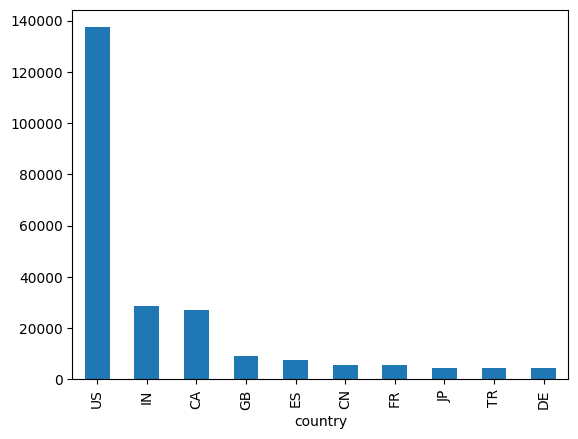

In [338]:
purchase_data.groupby('country')['price_in_usd'].sum().sort_values(ascending=False)[:10].plot.bar()

#### Total price Either added to cart,begin checkout or purchase by country

In [339]:
data.groupby(['country','type'])['price_in_usd'].sum()

country  type          
AE       add_to_cart       36518
         begin_checkout     4353
         purchase            552
AL       add_to_cart        5090
         begin_checkout      694
                           ...  
XK       begin_checkout      138
         purchase             20
ZA       add_to_cart       14804
         begin_checkout      478
         purchase             64
Name: price_in_usd, Length: 311, dtype: int64

#### Total LTV of all users by country

In [340]:
data.groupby(['country','type'])['ltv'].sum()

country  type          
AE       add_to_cart       70359
         begin_checkout    22326
         purchase           2655
AL       add_to_cart       10728
         begin_checkout      744
                           ...  
XK       begin_checkout      180
         purchase             60
ZA       add_to_cart       10149
         begin_checkout     1380
         purchase            305
Name: ltv, Length: 311, dtype: int64

In [341]:
groupby_data=data.groupby(['country','type','device'])['price_in_usd'].sum().reset_index()
groupby_data[groupby_data['type']=='purchase'].sort_values('price_in_usd',ascending=False)[:10]

,country,type,device,price_in_usd
630,US,purchase,desktop,81012
631,US,purchase,mobile,54084
299,IN,purchase,desktop,16224
99,CA,purchase,desktop,15396
300,IN,purchase,mobile,11205
100,CA,purchase,mobile,11105
223,GB,purchase,desktop,5278
198,ES,purchase,desktop,4535
214,FR,purchase,desktop,4075
224,GB,purchase,mobile,3570


In [342]:
groupby_data[groupby_data['type']=='add_to_cart'].sort_values('price_in_usd',ascending=False)[:10]

,country,type,device,price_in_usd
624,US,add_to_cart,desktop,4367252
625,US,add_to_cart,mobile,3046281
293,IN,add_to_cart,desktop,938394
93,CA,add_to_cart,desktop,735983
294,IN,add_to_cart,mobile,628545
94,CA,add_to_cart,mobile,553445
217,GB,add_to_cart,desktop,299538
192,ES,add_to_cart,desktop,218774
208,FR,add_to_cart,desktop,210254
116,CN,add_to_cart,desktop,208473


In [343]:
groupby_data[groupby_data['type']=='begin_checkout'].sort_values('price_in_usd',ascending=False)[:10]

,country,type,device,price_in_usd
627,US,begin_checkout,desktop,367162
628,US,begin_checkout,mobile,250061
296,IN,begin_checkout,desktop,80690
96,CA,begin_checkout,desktop,79819
97,CA,begin_checkout,mobile,57984
297,IN,begin_checkout,mobile,54333
220,GB,begin_checkout,desktop,23756
211,FR,begin_checkout,desktop,21521
221,GB,begin_checkout,mobile,19054
195,ES,begin_checkout,desktop,18563


<Figure size 1500x1000 with 0 Axes>

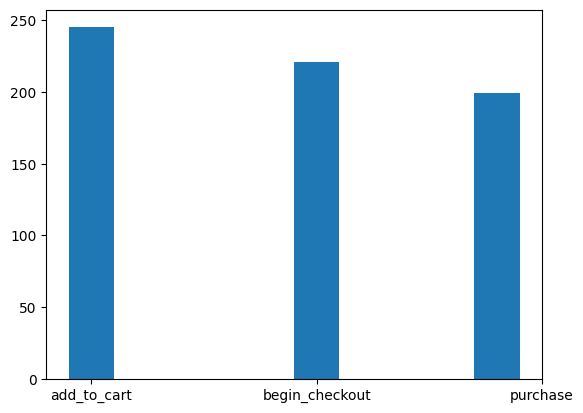

<Figure size 1500x1000 with 0 Axes>

In [344]:
plt.hist(data=groupby_data,x='type',align='left')
plt.figure(figsize=(15,10))

In [345]:
total_ltv_by_country_type=data.groupby(['country','type'])['ltv'].sum().reset_index()

In [346]:
total_ltv_by_country_type[total_ltv_by_country_type['type']=='purchase'].sort_values('ltv',ascending=False)[:10]

,country,type,ltv
295,US,purchase,1177584
48,CA,purchase,265695
136,IN,purchase,229619
92,ES,purchase,97663
101,GB,purchase,61005
57,CN,purchase,47595
72,DE,purchase,41478
285,TR,purchase,41008
98,FR,purchase,35426
204,MY,purchase,33032


In [347]:
data_sort_by_ltv=data.sort_values('ltv',ascending=False)

#### Top 20 Users with  user_id and their respective LTV and their Respective Country

In [348]:
unique_user_id=data_sort_by_ltv['user_id'].unique()
user_id_df=pd.DataFrame({'user_id':unique_user_id})
user_id_ltv=data[['user_id','ltv','country']].drop_duplicates()
user_id_ltv.sort_values('ltv',ascending=False)[:20]

,user_id,ltv,country
347990,29733,1530,AU
549588,15921,1424,US
353413,7765,1409,CA
126124,20086,1260,IN
1616,186,1215,IT
661420,27893,1200,CA
183,1885,1126,CA
128661,1298,1121,US
83236,3736,1049,CA
202789,29376,1019,US


#### Top 20 users With highest purchase (in dollers)

In [349]:
data[data['type']=='purchase'].groupby(['user_id','ltv','country'])['price_in_usd'].sum().sort_values(ascending=False)[:20]

user_id  ltv   country
7765     1409  CA         1410
27893    1200  CA         1200
11073    975   US          933
15696    765   ES          864
20451    795   US          857
1298     1121  US          818
28943    744   US          781
1569     748   US          752
22119    550   CO          640
15921    1424  US          636
1538     903   US          590
8551     784   US          569
12103    588   US          568
8687     708   TR          564
31119    533   US          564
13674    539   US          548
26690    678   US          536
3736     1049  CA          533
25804    524   IN          522
23549    486   CA          518
Name: price_in_usd, dtype: int64

In [350]:
data[data['type']=='begin_checkout'].groupby(['user_id','ltv'])['price_in_usd'].sum().sort_values(ascending=False)[:20]

user_id  ltv 
2183     0       14439
1298     1121    13916
27893    1200    10800
5832     0        7200
30669    347      5877
4129     0        5104
7765     1409     4728
18764    530      4506
29733    1530     4452
1569     748      4410
27552    355      4056
22757    86       3800
22281    676      3796
108      443      3670
8615     137      3658
30850    364      3642
26366    123      3522
27362    322      3440
28943    744      3430
5757     376      3182
Name: price_in_usd, dtype: int64

##### Maximum number of users by country

In [351]:
user_id_ltv['country'].value_counts().sort_values(ascending=False)[:10]

country
US    6536
IN    1361
CA    1162
GB     467
FR     285
ES     264
CN     251
TW     243
DE     232
SG     197
Name: count, dtype: int64

##### Minimum number of users by country

In [352]:
user_id_ltv['country'].value_counts().sort_values(ascending=True)[:20]

country
AM    1
TT    1
XK    2
MT    2
MM    2
BA    2
EE    3
LB    3
NP    3
HN    3
BS    3
OM    3
PY    3
PA    3
BH    4
GH    4
KH    4
JO    4
VE    4
JM    4
Name: count, dtype: int64

##### Total sell by brand

In [353]:
data.loc[data['type']=='purchase',['brand']].value_counts()

brand         
Google            13394
Android            1131
YouTube             591
#IamRemarkable      219
Google Cloud        140
Name: count, dtype: int64

In [354]:
brand_sold_df=data.loc[data['type']=='purchase',['brand']].value_counts().reset_index()

In [355]:
data['brand'].value_counts()

brand
Google            573278
Android           110357
YouTube            51943
#IamRemarkable     12831
Google Cloud        5920
Name: count, dtype: int64

In [356]:
data.loc[data['type']=='begin_checkout',['brand']].value_counts()

brand         
Google            62555
Android            5929
YouTube            4901
Google Cloud       1096
#IamRemarkable     1068
Name: count, dtype: int64

In [357]:
data.loc[data['type']=='add_to_cart',['brand']].value_counts()

brand         
Google            497329
Android           103297
YouTube            46451
#IamRemarkable     11544
Google Cloud        4684
Name: count, dtype: int64

In [358]:
data['variant'].value_counts().sort_values(ascending=False)[:20]

variant
Single Option Only    77121
 MD                    7088
LG                     6495
 LG                    5660
 SM                    5214
 XL                    4003
 XS                    3149
MD                     2251
SM                     1948
 2XL                   1481
XL                     1248
XS                     1081
 3XL                    703
Choose Size             471
6/12 MONTHS             338
 18/24 MONTHS           332
 RED                    290
 3T                     281
 BLUE                   272
 5/6T                   252
Name: count, dtype: int64

In [359]:
data['category'].value_counts()

category
Apparel                    293292
New                         73832
Accessories                 68115
Shop by Brand               49843
Campus Collection           48730
Clearance                   38156
Lifestyle                   29270
Bags                        28929
Office                      28279
Drinkware                   25770
Uncategorized Items         22867
Notebooks & Journals        16715
Stationery                   7739
Writing Instruments          6887
Small Goods                  5716
Google                       5537
Electronics Accessories      2230
Fun                          1173
Gift Cards                    669
Eco-Friendly                  561
Black Lives Matter             19
Name: count, dtype: int64

#### Sold Item by Category in $

In [360]:
data[data['type']=='purchase'].groupby(['category'])['price_in_usd'].sum().sort_values(ascending=False)

category
Apparel                    166466
Bags                        19691
New                         19096
Campus Collection           16162
Shop by Brand               15349
Accessories                 14633
Drinkware                   10958
Uncategorized Items         10870
Lifestyle                   10277
Clearance                    8889
Office                       4791
Gift Cards                   2500
Small Goods                  2483
Google                        938
Stationery                    719
Writing Instruments           542
Electronics Accessories       540
Notebooks & Journals          267
Eco-Friendly                  247
Black Lives Matter            104
Fun                            82
Name: price_in_usd, dtype: int64

<Axes: xlabel='category'>

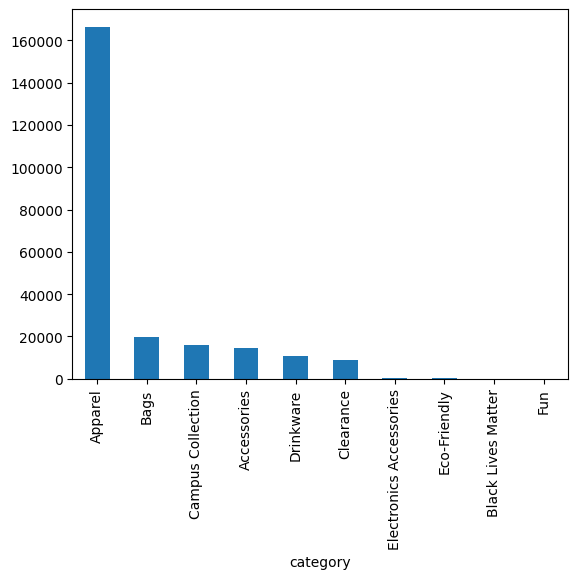

In [361]:
data[data['type']=='purchase'].groupby('category')['price_in_usd'].sum()[:10].sort_values(ascending=False).plot.bar()

In [362]:
data[data['type']=='begin_checkout'].groupby('category')['price_in_usd'].sum().sort_values(ascending=False)

category
Apparel                    723352
Bags                       129953
New                        102019
Shop by Brand               84210
Accessories                 73649
Campus Collection           67248
Lifestyle                   57733
Drinkware                   47726
Clearance                   44089
Uncategorized Items         41198
Office                      25377
Gift Cards                  24395
Small Goods                 11114
Google                       4502
Stationery                   3682
Writing Instruments          2814
Electronics Accessories      2470
Eco-Friendly                 2375
Notebooks & Journals         1326
Black Lives Matter            464
Fun                           232
Name: price_in_usd, dtype: int64

In [363]:
data[data['type']=='add_to_cart'].groupby('category')['price_in_usd'].sum().sort_values(ascending=False)

category
Apparel                    9822267
New                        1032502
Shop by Brand              1026581
Accessories                 977364
Uncategorized Items         741694
Clearance                   641588
Bags                        607306
Campus Collection           593067
Lifestyle                   524338
Drinkware                   415838
Notebooks & Journals        238425
Office                      163332
Google                       27510
Writing Instruments          26131
Stationery                   25465
Electronics Accessories      23032
Small Goods                  18902
Gift Cards                   17675
Eco-Friendly                 10097
Fun                           2032
Black Lives Matter             522
Name: price_in_usd, dtype: int64

In [364]:
data['name'].value_counts()

name
Google Navy Speckled Tee              14659
Google Zip Hoodie F/C                 14192
Super G Unisex Joggers                13394
Google Crewneck Sweatshirt Navy       11837
Google Women's Striped L/S            11796
                                      ...  
Google SF Campus Mug                      4
Google Mountain View Campus Bottle        3
Google Tudes Thermal Bottle               2
Google 5K Run 2020 Unisex Tee             2
Google Tritan Bottle Gray                 1
Name: count, Length: 421, dtype: int64

#### Top 20 product sold by name

In [365]:
data[data['type']=='purchase'].groupby('name')['price_in_usd'].sum().sort_values(ascending=False)[:20]

name
Google Zip Hoodie F/C                      12696
Google Crewneck Sweatshirt Navy             9900
Google Men's Tech Fleece Grey               9489
Super G Unisex Joggers                      8971
Google Badge Heavyweight Pullover Black     8418
Google Crewneck Sweatshirt Green            7788
Google Men's Puff Jacket Black              5911
Google Women's Puff Jacket Black            5750
Google Sherpa Zip Hoodie Charcoal           5720
Google Men's Tech Fleece Vest Charcoal      4996
Google Utility BackPack                     4992
Android Iconic Crewneck Sweatshirt          4752
Google Sherpa Zip Hoodie Navy               4620
Google Campus Bike                          4440
Google Red Speckled Tee                     4116
Google Crewneck Sweatshirt Grey             4114
Google F/C Longsleeve Charcoal              4044
Google Black Cloud Zip Hoodie               3882
Google Navy Speckled Tee                    3744
Google Cotopaxi Shell                       3572
Name: price_in_

<Axes: xlabel='name'>

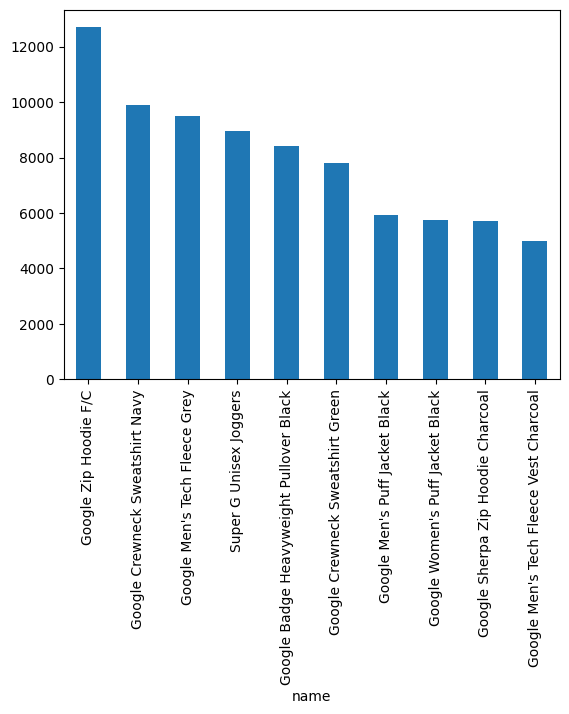

In [366]:
data[data['type']=='purchase'].groupby('name')['price_in_usd'].sum().sort_values(ascending=False)[:10].plot.bar()

#### Total sell by Name and Brand [Top 20]

In [367]:
data[data['type']=='purchase'].groupby(['name','brand'])['price_in_usd'].sum().sort_values(ascending=False)[:20]

name                                     brand       
Google Zip Hoodie F/C                    Google          12696
Google Crewneck Sweatshirt Navy          Google           9900
Google Men's Tech Fleece Grey            Google           9489
Super G Unisex Joggers                   Google           8971
Google Badge Heavyweight Pullover Black  Google           8418
Google Crewneck Sweatshirt Green         Google           7788
Google Men's Puff Jacket Black           Google           5911
Google Women's Puff Jacket Black         Google           5750
Google Sherpa Zip Hoodie Charcoal        Google           5720
Google Men's Tech Fleece Vest Charcoal   Google           4996
Google Utility BackPack                  Google           4992
Android Iconic Crewneck Sweatshirt       Android          4752
Google Sherpa Zip Hoodie Navy            Google           4620
Google Campus Bike                       Google           4440
Google Red Speckled Tee                  Google           4116
G

#### Total sell by user_id [Top 20 Users]

In [368]:
data[data['type']=='purchase'].groupby('user_id')['price_in_usd'].sum().sort_values(ascending=False)[:20]

user_id
7765     1410
27893    1200
11073     933
15696     864
20451     857
1298      818
28943     781
1569      752
22119     640
15921     636
1538      590
8551      569
12103     568
8687      564
31119     564
13674     548
26690     536
3736      533
25804     522
23549     518
Name: price_in_usd, dtype: int64

#### Diffrence between user visited and action(purchase product,add product to cart or begin checkout) in days

In [369]:
data['time_diff']=(data['events_date']-data['users_date']).dt.days

#### Extract Year from Events

In [370]:
data['year']=data['events_date'].dt.year

#### Extract Month from Event Date

In [371]:
data['month']=data['events_date'].dt.month

#### Extract Day Of Week from Event Date

In [372]:
data['day']=data['events_date'].dt.dayofweek

##### Mapping of days From Numbers to String

In [373]:
data['day'].value_counts()
days_of_week_map={0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}
data['day']=data['day'].map(days_of_week_map)

##### Mapping months

In [374]:
month_mapping={11:'Nov',12:'Dec',1:'Jan'}
data['month']=data['month'].map(month_mapping)

#### Total sell by month

In [375]:
data[data['type']=='purchase'].groupby('month')['price_in_usd'].sum().sort_values(ascending=False)

month
Dec    131595
Nov    122271
Jan     51738
Name: price_in_usd, dtype: int64

<Axes: xlabel='Total Sell By Month'>

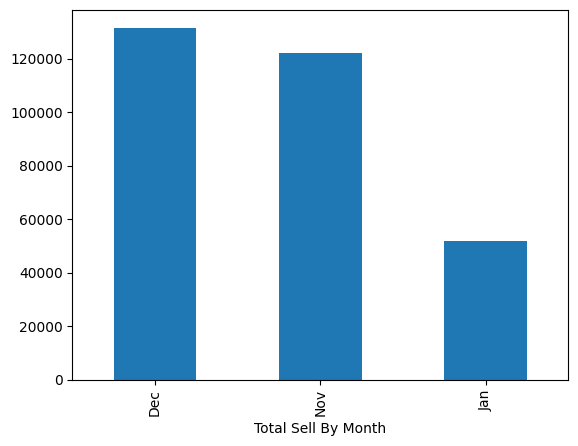

In [376]:
data[data['type']=='purchase'].groupby('month')['price_in_usd'].sum().sort_values(ascending=False).plot.bar(xlabel='Total Sell By Month')

<Axes: title={'center': 'Purchase By Month'}, ylabel='price_in_usd'>

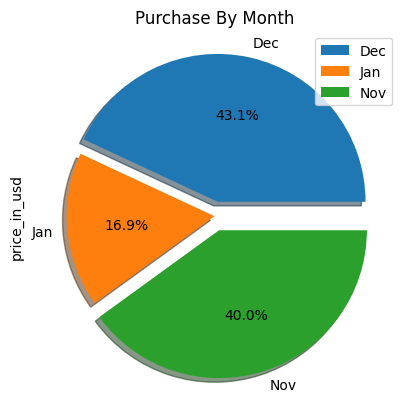

In [377]:
data[data['type']=='purchase'].groupby('month')['price_in_usd'].sum().plot.pie(title='Purchase By Month',
                                                                               autopct='%1.1f%%',
                                                                               legend=True,
                                                                               shadow=True,
                                                                               explode=(0.1, 0, 0.1))

In [378]:
data[data['type']=='purchase'].groupby('day')['price_in_usd'].sum().sort_values(ascending=False)

day
Tue    54201
Mon    53826
Sun    50366
Thu    50109
Wed    40428
Fri    32850
Sat    23824
Name: price_in_usd, dtype: int64

<Axes: xlabel='Total Sell by Days'>

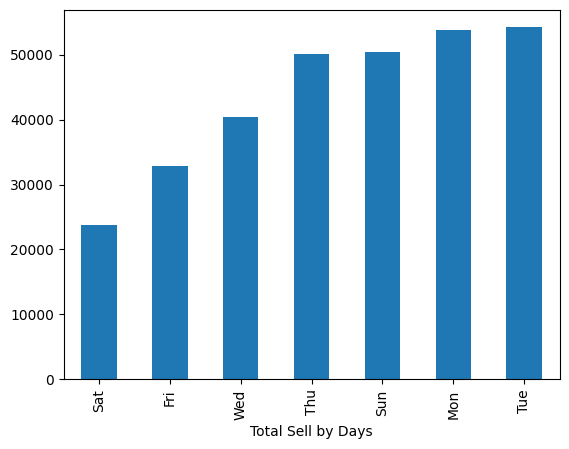

In [379]:
data[data['type']=='purchase'].groupby('day')['price_in_usd'].sum().sort_values().plot.bar(xlabel='Total Sell by Days')

<Axes: xlabel='day'>

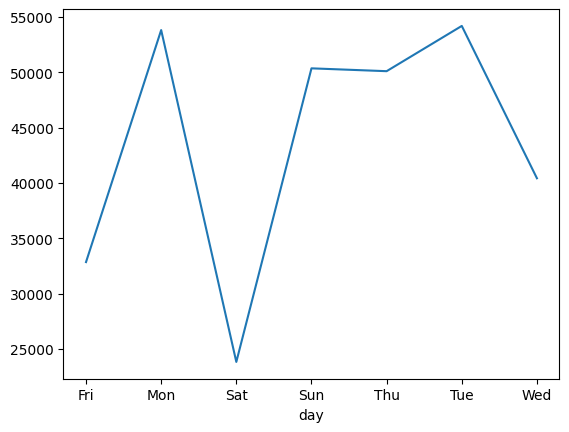

In [380]:
data[data['type']=='purchase'].groupby('day')['price_in_usd'].sum().plot.line()

In [381]:
data[data['type']=='purchase'].groupby(['year','month'])['price_in_usd'].sum()

year  month
2020  Dec      131595
      Nov      122271
2021  Jan       51738
Name: price_in_usd, dtype: int64

In [382]:
data[data['type']=='purchase'].groupby(['year','month','day'])['price_in_usd'].sum()

year  month  day
2020  Dec    Fri    13888
             Mon    24154
             Sat     8390
             Sun    16873
             Thu    20687
             Tue    27053
             Wed    20550
      Nov    Fri    12857
             Mon    21288
             Sat    11380
             Sun    27411
             Thu    20152
             Tue    16902
             Wed    12281
2021  Jan    Fri     6105
             Mon     8384
             Sat     4054
             Sun     6082
             Thu     9270
             Tue    10246
             Wed     7597
Name: price_in_usd, dtype: int64

#### Total sell By year and brand

In [383]:
data[data['type']=='purchase'].groupby(['year','brand'])['price_in_usd'].sum()

year  brand         
2020  #IamRemarkable      2224
      Android            13697
      Google            229066
      Google Cloud        1129
      YouTube             7750
2021  #IamRemarkable       250
      Android             2712
      Google             44283
      Google Cloud        3665
      YouTube              828
Name: price_in_usd, dtype: int64

<Axes: xlabel='Total sell by year and brand'>

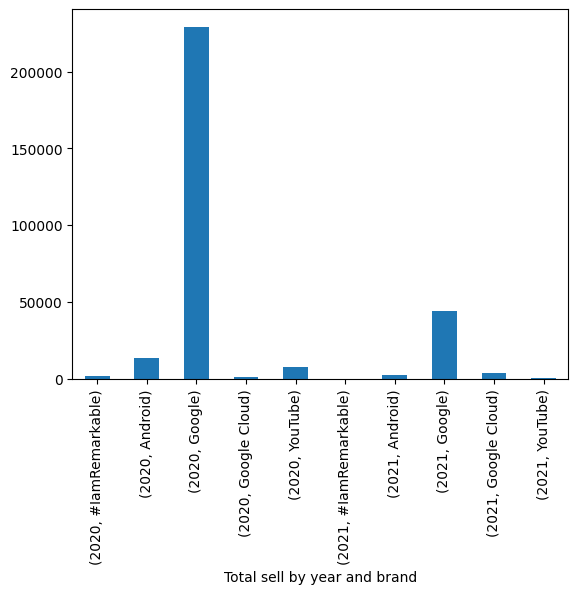

In [384]:
data[data['type']=='purchase'].groupby(['year','brand'])['price_in_usd'].sum().plot.bar(xlabel='Total sell by year and brand')

#### Total sell By YEAR and CATEGORY

In [385]:
data[data['type']=='purchase'].groupby(['year','category'])['price_in_usd'].sum()

year  category               
2020  Accessories                 11268
      Apparel                    137588
      Bags                        16784
      Black Lives Matter            104
      Campus Collection           14333
      Clearance                    7796
      Drinkware                    9130
      Eco-Friendly                  171
      Electronics Accessories       400
      Fun                            72
      Gift Cards                   1300
      Google                        733
      Lifestyle                    8014
      New                         16565
      Notebooks & Journals          223
      Office                       3972
      Shop by Brand               13177
      Small Goods                  1831
      Stationery                    502
      Uncategorized Items          9493
      Writing Instruments           410
2021  Accessories                  3365
      Apparel                     28878
      Bags                         2907
      Camp

#### Total sell in year-2020

In [386]:
mask=(data['type']=='purchase') & (data['year']==2020) 
(data[mask].sort_values('price_in_usd',ascending=False).groupby('category').head(1))

,user_id,country,device,type,item_id,events_date,ltv,users_date,name,brand,variant,category,price_in_usd,time_diff,year,month,day
285713,7841,CA,mobile,purchase,570,2020-12-11 02:18:17,128,2020-11-24 22:00:17,Google Raincoat Navy,Google,XL,Apparel,120,16,2020,Dec,Thu
1582,18510,US,desktop,purchase,58,2020-11-12 20:35:06,120,2020-10-10 02:39:24,Google Utility BackPack,Google,Single Option Only,Bags,96,33,2020,Nov,Wed
415706,29256,AU,mobile,purchase,239,2020-12-17 10:42:50,268,2020-10-01 12:51:04,Google Women's Microfleece Jacket Black,Google,SM,Uncategorized Items,75,76,2020,Dec,Wed
383190,23151,US,desktop,purchase,335,2020-12-15 23:16:51,81,2020-12-15 22:34:27,BLM Unisex Pullover Hoodie,Google,3XL,Black Lives Matter,58,0,2020,Dec,Mon
207,9747,US,desktop,purchase,758,2020-11-02 20:52:37,55,2020-11-02 20:39:38,Google Land & Sea French Terry Sweatshirt,Google,2XL,Shop by Brand,55,0,2020,Nov,Sun
464232,19585,US,mobile,purchase,748,2020-12-20 14:42:31,100,2020-12-14 21:56:25,Gift Card - $50.00,Google,Single Option Only,Gift Cards,50,5,2020,Dec,Sat
266556,15270,ES,mobile,purchase,497,2020-12-10 07:34:17,159,2020-11-13 05:15:23,Google Seaport Tote,Google,Single Option Only,New,48,27,2020,Dec,Wed
16537,15841,US,mobile,purchase,616,2020-11-19 13:28:23,195,2020-08-07 19:26:39,Google SF Campus Zip Hoodie,Google,MD,Clearance,41,103,2020,Nov,Wed
337271,25961,US,desktop,purchase,504,2020-12-13 21:19:35,97,2020-09-07 16:34:01,Google Cambridge Campus Zip Hoodie,Google,MD,Campus Collection,41,97,2020,Dec,Sat
267210,31276,IN,mobile,purchase,122,2020-12-10 07:53:33,38,2020-11-27 21:49:51,Google Campus Bike,Google,Single Option Only,Accessories,40,12,2020,Dec,Wed


#### Costly Product in each category

In [387]:
data.groupby('category')['price_in_usd'].max()

category
Accessories                 40
Apparel                    120
Bags                       120
Black Lives Matter          58
Campus Collection           58
Clearance                   58
Drinkware                   40
Eco-Friendly                24
Electronics Accessories     12
Fun                          2
Gift Cards                 313
Google                      25
Lifestyle                   88
New                         60
Notebooks & Journals        16
Office                      26
Shop by Brand               55
Small Goods                 20
Stationery                  12
Uncategorized Items         88
Writing Instruments         17
Name: price_in_usd, dtype: int64

#### Top10 Users who purchase Product with highest LTV

In [388]:
data[data['type']=='purchase'].groupby('user_id')['ltv'].max()[:10].sort_values(ascending=False)

user_id
15    704
17    378
28    285
3     231
23    167
31    111
4     102
6      75
7      55
9      41
Name: ltv, dtype: int64

#### Top 20 Product sold by brand,category and name

In [389]:
data[data['type']=='purchase'].groupby(['brand','category','name'])['price_in_usd'].max().sort_values(ascending=False).reset_index()[:20]

,brand,category,name,price_in_usd
0,Google,Apparel,Google Raincoat Navy,120
1,Google,Apparel,Google Women's Puff Jacket Black,115
2,Google,Apparel,Google Men's Puff Jacket Black,115
3,Google,Gift Cards,Gift Card- $100.00,100
4,Google,Bags,Google Utility BackPack,96
5,Google,Apparel,Google Men's Tech Fleece Grey,89
6,Google,Apparel,Google Women's Tech Fleece Grey,89
7,Google,Apparel,Google Women's Softshell Moss,79
8,Google,Apparel,Google Men's Softshell Moss,79
9,Google,Apparel,Google Men's Tech Fleece Vest Charcoal,79


In [390]:
data[data['type']=='purchase'].groupby(['brand','category','name'])['price_in_usd'].agg(['max','count']).sort_values('max',ascending=False).reset_index()[:20]

,brand,category,name,max,count
0,Google,Apparel,Google Raincoat Navy,120,26
1,Google,Apparel,Google Women's Puff Jacket Black,115,56
2,Google,Apparel,Google Men's Puff Jacket Black,115,63
3,Google,Gift Cards,Gift Card- $100.00,100,12
4,Google,Bags,Google Utility BackPack,96,52
5,Google,Apparel,Google Men's Tech Fleece Grey,89,123
6,Google,Apparel,Google Women's Tech Fleece Grey,89,19
7,Google,Apparel,Google Women's Softshell Moss,79,11
8,Google,Apparel,Google Men's Softshell Moss,79,34
9,Google,Apparel,Google Men's Tech Fleece Vest Charcoal,79,76


In [391]:
data[data['type']=='purchase'].groupby(['brand','category','name'])['price_in_usd'].agg(['max','min','count','sum']).sort_values('max',ascending=False).reset_index()[:20]


,brand,category,name,max,min,count,sum
0,Google,Apparel,Google Raincoat Navy,120,96,26,2688
1,Google,Apparel,Google Women's Puff Jacket Black,115,92,56,5750
2,Google,Apparel,Google Men's Puff Jacket Black,115,92,63,5911
3,Google,Gift Cards,Gift Card- $100.00,100,100,12,1200
4,Google,Bags,Google Utility BackPack,96,96,52,4992
5,Google,Apparel,Google Men's Tech Fleece Grey,89,71,123,9489
6,Google,Apparel,Google Women's Tech Fleece Grey,89,71,19,1457
7,Google,Apparel,Google Women's Softshell Moss,79,79,11,869
8,Google,Apparel,Google Men's Softshell Moss,79,79,34,2686
9,Google,Apparel,Google Men's Tech Fleece Vest Charcoal,79,63,76,4996


<Axes: xlabel='brand'>

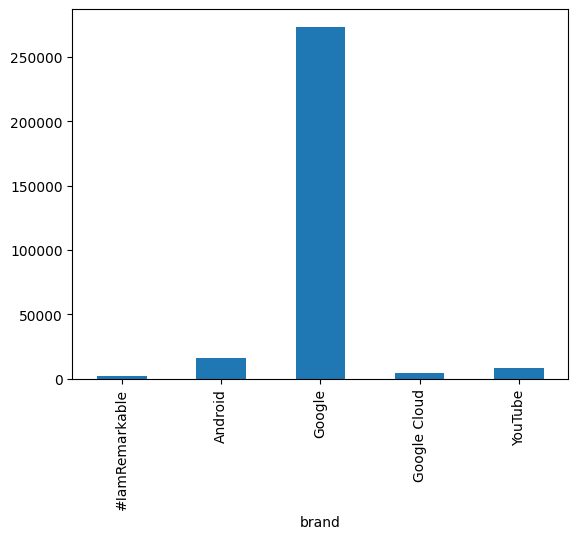

In [392]:
data[data['type']=='purchase'].groupby(['brand'])['price_in_usd'].sum().plot.bar()